# Banking Customer Churn Prediction usng Artificial Neural Networks (ANN)

## Problem Description:

In the banking industry, customer churn (the loss of customers) poses a significant challenge, impacting revenue and growth. To address this issue, a predictive model can be developed to estimate the likelihood that a customer will leave the bank.

The goal of this problem is to build a predictive model that can identify customers who are at risk of churning.This project leverages a deep learning model, specifically an Artificial Neural Network (ANN), to predict whether a bank customer is likely to churn based on their profile information. By accurately predicting which customers are likely to leave, the bank can take proactive measures to retain them, such as personalized offers or improved customer service.


**Dataset:**

The dataset for this problem includes various features related to customer behavior and demographics, such as:

- **CreditScore:** A numerical score representing the creditworthiness of the customer.
- **Geography:** The geographical region where the customer resides.
- **Gender:** The gender of the customer.
- **Age:** The age of the customer.
- **Tenure:** The number of years the customer has been with the bank.
- **Balance:** The current balance of the customer's account.
- **NumOfProducts:** The number of products the customer has with the bank.
- **HasCrCard:** A binary indicator of whether the customer has a credit card.
- **IsActiveMember:** A binary indicator of whether the customer is an active member of the bank.
- **EstimatedSalary:** The estimated annual salary of the customer.

**I will use the following pipeline**

- Data Collection
- Exploratory Data Analysis (EDA)
- Data Cleaning Preprocessing
- Model Training
- Hyperparameter Tuning
- Final Production model 
- Model Testing and Evaluation
- Conclude and interpret the model results

In this notebook, I will perform deep learning modelling and I will approach all the steps in more detail, with an overview of them and the explanation of why I am making each decision.

In [68]:
#importing required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pickle

### Reading the dataset

In [69]:
# Loading the train dataset
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
# Checking the number unique values in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [71]:
# Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [72]:
# Statistical description
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Data Preprocessing

In [73]:
# Checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [74]:
# Checking for any duplicated values
df.duplicated().any()

False

Our dataset has no null values and any duplicated values in it, therefore we are good to go

In [75]:
# Displaying the column/feature names
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [76]:
# Dropping irrelevant features
df=df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Rownumber, CustomerId has all unique id which can be removed.
Also Surname has to be removed.
The above columns have no influence on furthure analysis and model building.

### Univariant Data Analysis

#### Categorical features

Male      5457
Female    4543
Name: Gender, dtype: int64


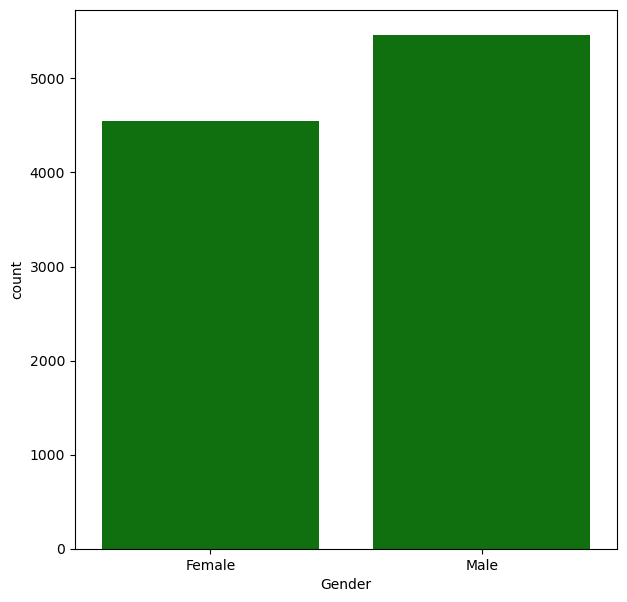

****************************************************
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


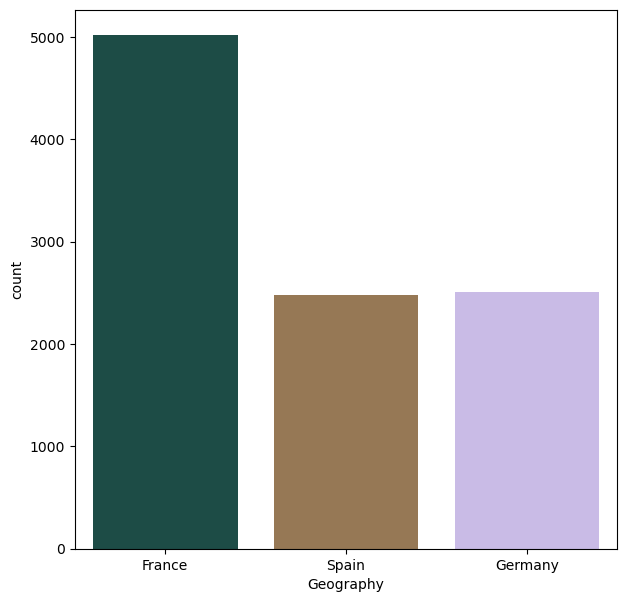

****************************************************
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


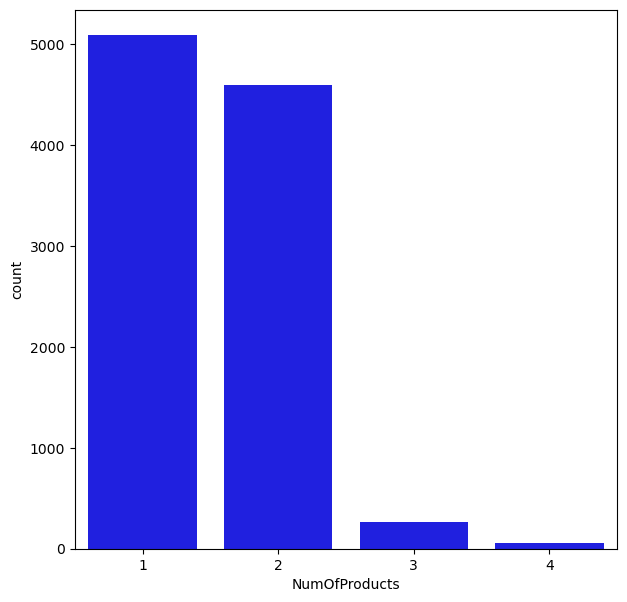

****************************************************
1    7055
0    2945
Name: HasCrCard, dtype: int64


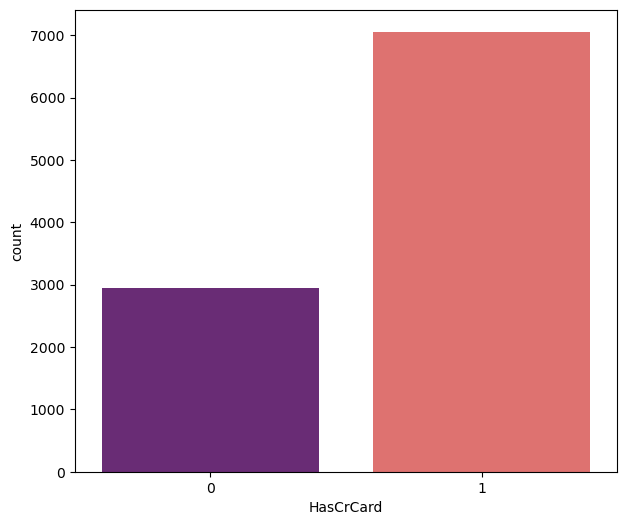

****************************************************
1    5151
0    4849
Name: IsActiveMember, dtype: int64


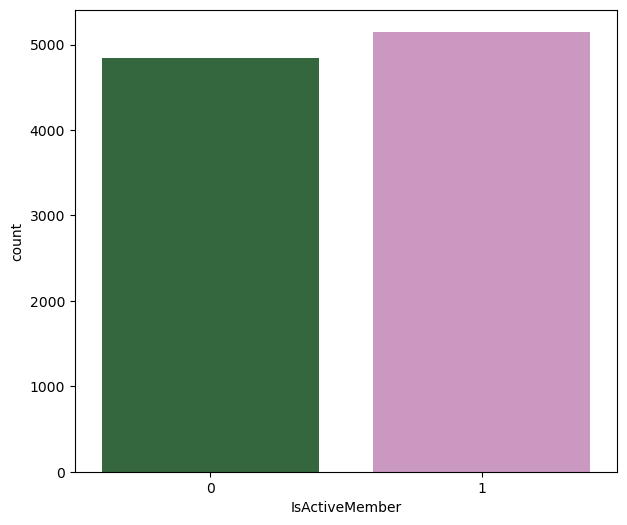

In [77]:
# Gender Distribution
print(df['Gender'].value_counts())
fig = plt.figure(figsize=(7, 7))
sns.countplot(data=df, x='Gender', palette=['green'])
plt.show()

print('****************************************************')

# Geography Distribution
print(df['Geography'].value_counts())
fig = plt.figure(figsize=(7, 7))
sns.countplot(data=df, x='Geography', palette='cubehelix')
plt.show()

print('****************************************************')

# Number of Products Distribution
print(df['NumOfProducts'].value_counts())
fig = plt.figure(figsize=(7, 7))
sns.countplot(data=df, x='NumOfProducts', palette=['blue'])
plt.show()

print('****************************************************')

# Credit Card Ownership Distribution
print(df['HasCrCard'].value_counts())
fig = plt.figure(figsize=(7, 6))
sns.countplot(data=df, x='HasCrCard', palette='magma')
plt.show()

print('****************************************************')

# Active Membership Distribution
print(df['IsActiveMember'].value_counts())
fig = plt.figure(figsize=(7, 6))
sns.countplot(data=df, x='IsActiveMember', palette='cubehelix')
plt.show()

From the bar graphs depicting gender distribution, it is evident that the bank has a higher number of male customers (5457) compared to female customers (4543). This indicates a relatively balanced gender ratio, with a slight skew towards male customers. The gender distribution appears fairly equitable, but the bank might consider further analyzing if there are any gender-specific patterns in customer behavior or churn rates.

In the geographical distribution, France has the highest number of customers (5014), followed by Germany (2509) and Spain (2477). This suggests that the bank's presence is stronger in France compared to the other two countries. The number of products owned by customers is also highlighted, with most customers having one product (5084), followed by two products (4590), and a smaller number having three (266) or four products (60). Additionally, a large majority of customers possess a credit card (7055) compared to those who do not (2945). The active membership data shows a nearly balanced distribution between active members (5151) and non-active members (4849). These insights can help the bank target retention strategies more effectively by focusing on high-value countries, product ownership patterns, and the impact of credit card ownership and activity status on customer loyalty.

0    7963
1    2037
Name: Exited, dtype: int64


<AxesSubplot:xlabel='Exited', ylabel='count'>

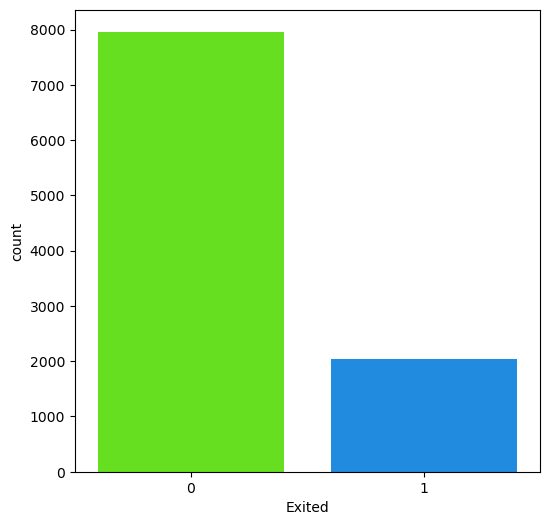

In [78]:
# Analysing the target variable
Customers_excited_prediction=df.Exited.value_counts()
print(Customers_excited_prediction)
fig=plt.figure(figsize=(6,6))
sns.countplot(data=df,x='Exited',palette='gist_rainbow')

The target variable "Exited" represents whether a customer has churned or not. The distribution is as follows:

- **Exited (1): 2037 customers**
- **Not Exited (0): 7963 customers**

This indicates that there is a significant imbalance in the target variable, with a much higher number of customers who have not exited (7963) compared to those who have exited (2037). This imbalance, where the "Not Exited" class is more prevalent, suggests that churn prediction might be challenging due to the skewed distribution. In predictive modeling, such imbalances can lead to biased models that might be more inclined to predict the majority class (not exited) while underestimating the minority class (exited).

To address this issue, various techniques can but in this case we're going to use oversampling method (SMOTE) to increase the number of churn cases or undersampling methods to reduce the number of non-churn cases to balance the dataset.

 #### Numerical features

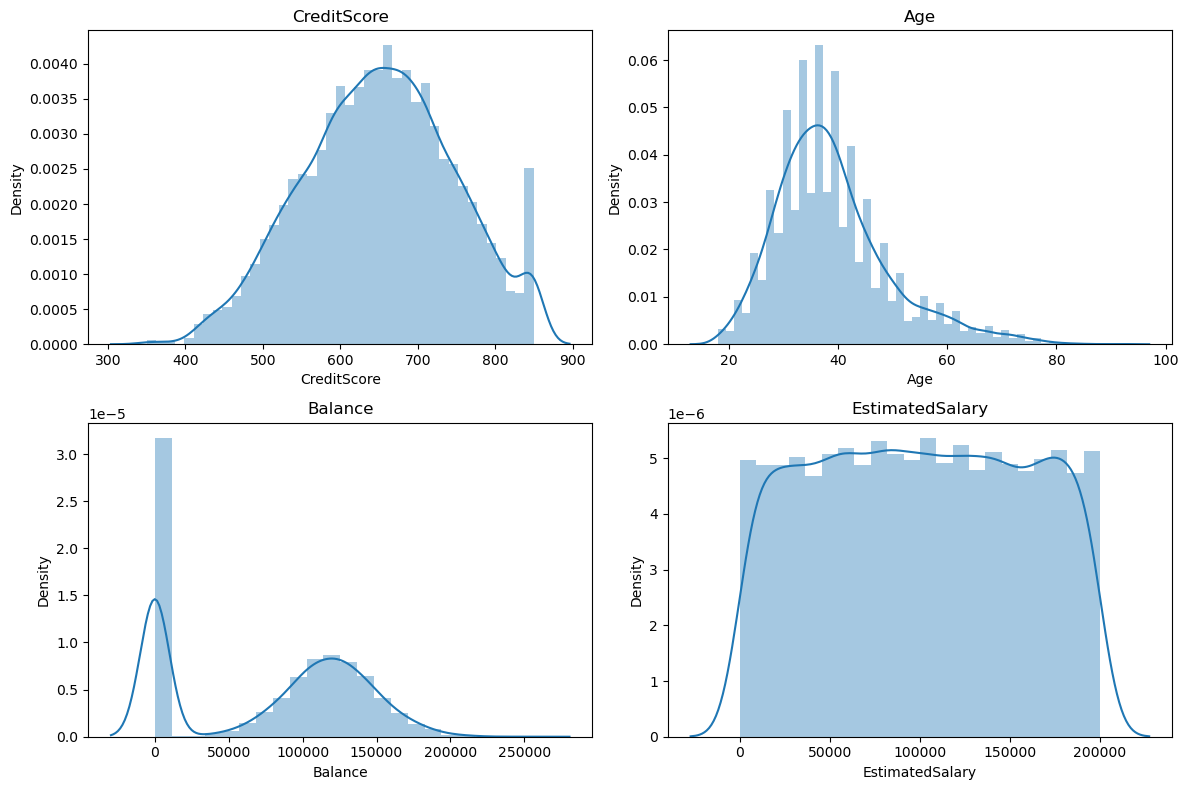

In [79]:
# Create a figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the distributions
sns.distplot(df['CreditScore'], ax=axes[0, 0])
axes[0, 0].set_title('CreditScore')

sns.distplot(df['Age'], ax=axes[0, 1])
axes[0, 1].set_title('Age')

sns.distplot(df['Balance'], ax=axes[1, 0])
axes[1, 0].set_title('Balance')

sns.distplot(df['EstimatedSalary'], ax=axes[1, 1])
axes[1, 1].set_title('EstimatedSalary')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

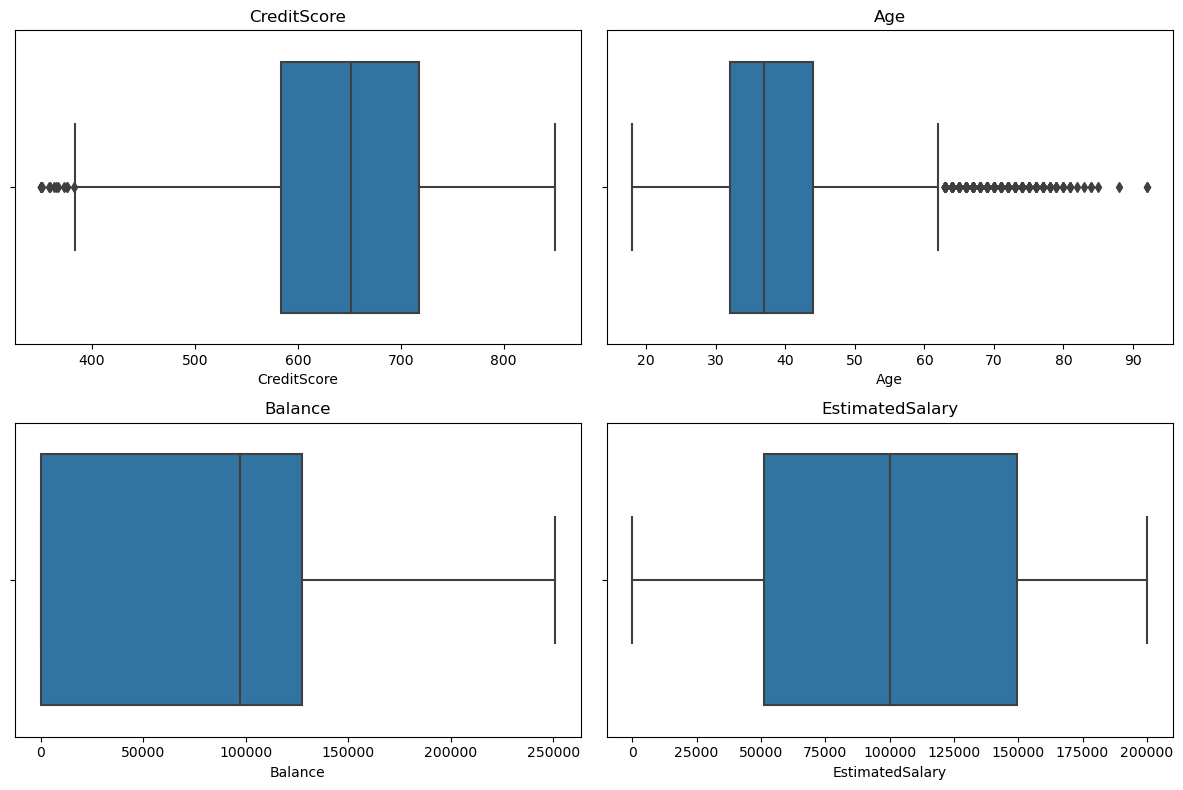

In [80]:
# Creating a figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotting the distributions
sns.boxplot(df['CreditScore'], ax=axes[0, 0])
axes[0, 0].set_title('CreditScore')

sns.boxplot(df['Age'], ax=axes[0, 1])
axes[0, 1].set_title('Age')

sns.boxplot(df['Balance'], ax=axes[1, 0])
axes[1, 0].set_title('Balance')

sns.boxplot(df['EstimatedSalary'], ax=axes[1, 1])
axes[1, 1].set_title('EstimatedSalary')

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

It seems like the balance and estimated salary features are distributed fairly.
There are some outliers in the "CreditScore" and "Age" features that have been identified, potentially distorting the data distribution and impacting model performance.

### Bivariant Analysis

#### Analysing target variable with categorical variable

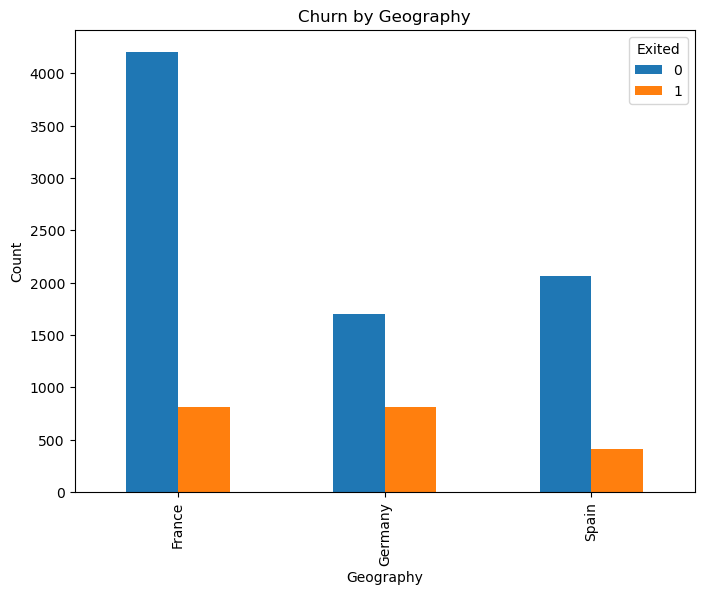

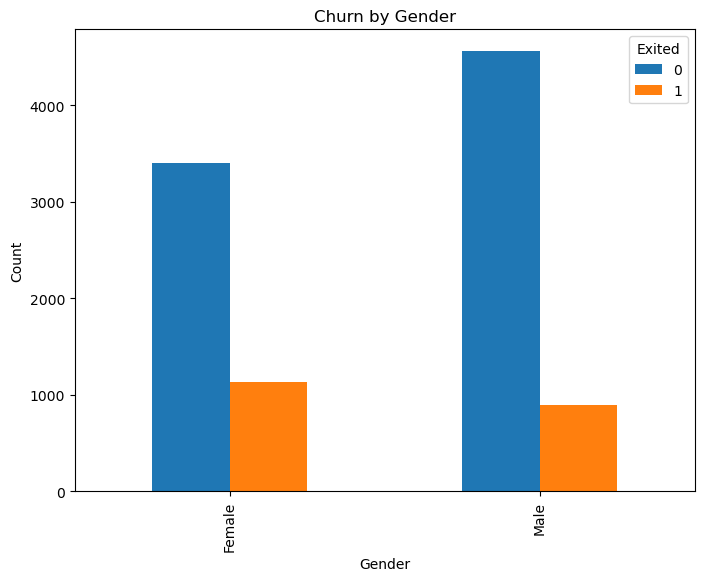

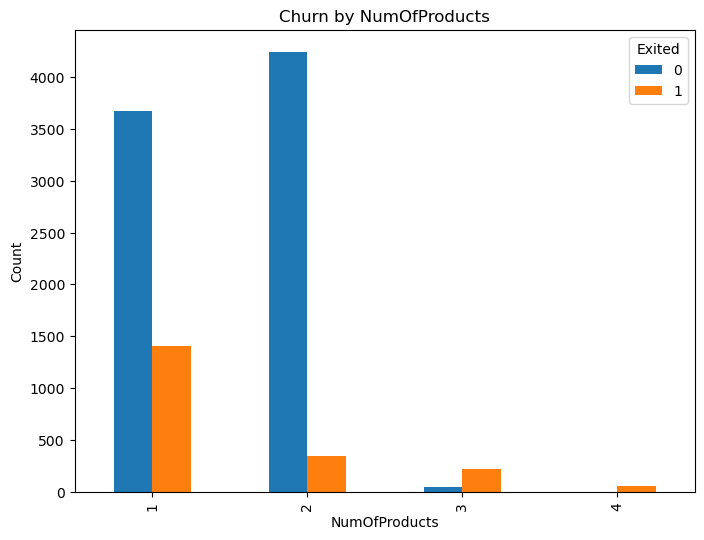

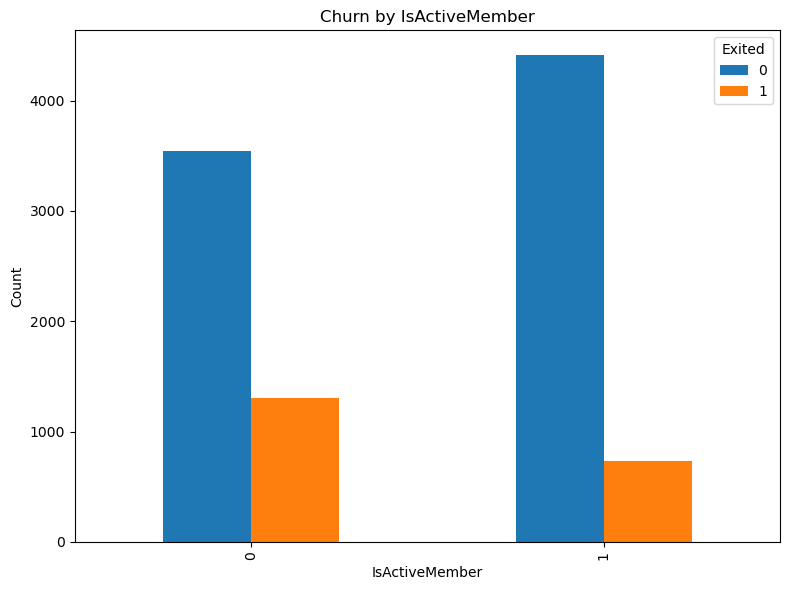

In [81]:
# Geography
fig, ax1 = plt.subplots(figsize=(8, 6))
df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0).plot(kind='bar', ax=ax1)
ax1.set_xlabel('Geography')
ax1.set_ylabel('Count')
ax1.set_title('Churn by Geography')

# Gender
fig, ax2 = plt.subplots(figsize=(8, 6))
df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0).plot(kind='bar', ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')
ax2.set_title('Churn by Gender')

# NumOfProducts
fig, ax3 = plt.subplots(figsize=(8, 6))
df.groupby(['NumOfProducts', 'Exited']).size().unstack(fill_value=0).plot(kind='bar', ax=ax3)
ax3.set_xlabel('NumOfProducts')
ax3.set_ylabel('Count')
ax3.set_title('Churn by NumOfProducts')

# IsActiveMember
fig, ax4 = plt.subplots(figsize=(8, 6))
df.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0).plot(kind='bar', ax=ax4)
ax4.set_xlabel('IsActiveMember')
ax4.set_ylabel('Count')
ax4.set_title('Churn by IsActiveMember')

plt.tight_layout()
plt.show()

### Findings

1. Geography
The bar plot for "Geography" against the "Exited" status shows that customers in Spain generally have a lower churn rate compared to those in Germany and France. In Germany and France, the proportion of customers who exited is noticeably higher. This suggests that geographical factors might influence customer retention, with France potentially having stronger customer satisfaction or engagement compared to the other countries. The subsequent bar plot reinforces this, showing that France has the highest number of customers who stayed, while Germany and Spain show higher counts of exited customers.


2. Gender
The visualization for "Gender" indicates that female customers have a higher percentage of exits compared to male customers. This suggests that gender could be a significant factor in predicting churn, with females potentially having a higher churn risk. The count-based bar plot confirms this, as the total number of exited female customers is greater than that of males. This highlights the need for gender-specific retention strategies.


3. NumOfProducts
The findings for "NumOfProducts" shows that customers with fewer products (e.g., one product) have a higher churn rate compared to those with more products. This trend is evident in the count-based bar plot above, where customers with fewer products have higher numbers of exits. This suggests that increasing the number of products or services a customer holds might reduce their likelihood of churning.


4. IsActiveMember
The bar plot for "IsActiveMember" reveals that active members have a significantly lower churn rate compared to inactive members. The findings shows that the majority of exited customers are inactive members. This confirms that engagement is a crucial factor in customer retention, with active members being less likely to exit.

#### Analysing target variable with numerical variable

Text(0.5, 1.0, 'Churn by EstimatedSalary')

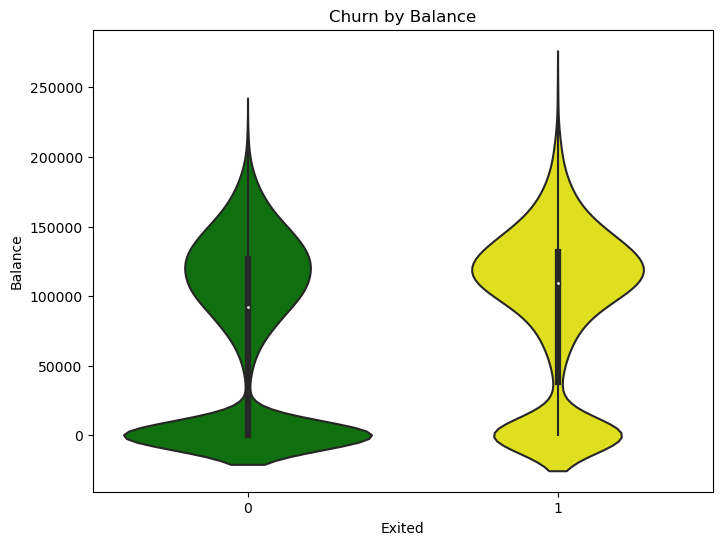

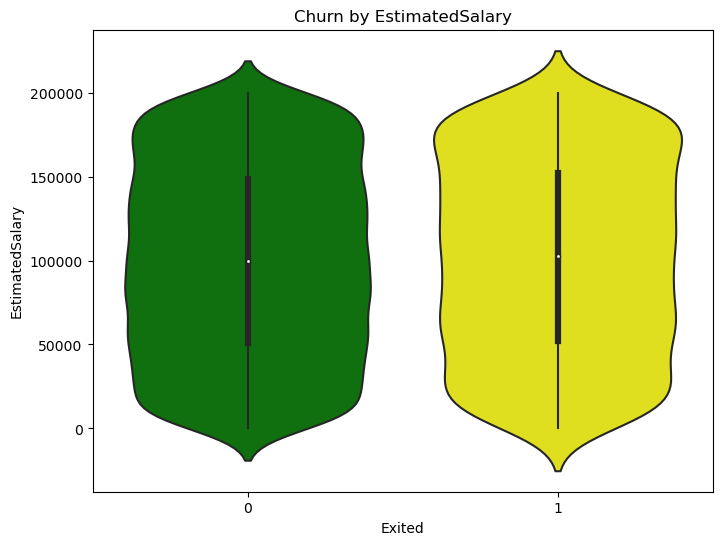

In [82]:
# Violin plotting
fig, ax5 = plt.subplots(figsize=(8, 6))
sns.violinplot(x='Exited', y='Balance', data=df, ax=ax5, palette=['green', 'yellow'])
ax5.set_xlabel('Exited')
ax5.set_ylabel('Balance')
ax5.set_title('Churn by Balance')

fig, ax6 = plt.subplots(figsize=(8, 6))
sns.violinplot(x='Exited', y='EstimatedSalary', data=df, ax=ax6, palette=['green', 'yellow'])
ax6.set_xlabel('Exited')
ax6.set_ylabel('EstimatedSalary')
ax6.set_title('Churn by EstimatedSalary')

### Findngs

Balance and EstimatedSalary

The violin plots for "Balance" and "EstimatedSalary" against "Exited" show that customers who have exited tend to have lower balances and salaries compared to those who stayed. The darker colors in the violin plots highlight this distinction, indicating that financial metrics are closely linked with churn. Lower balances and estimated salaries are associated with a higher likelihood of churn, suggesting that financial stability may influence customer retention.

These analyses reveal key patterns in the data, helping to identify which factors most significantly impact customer churn and where targeted retention efforts might be needed.

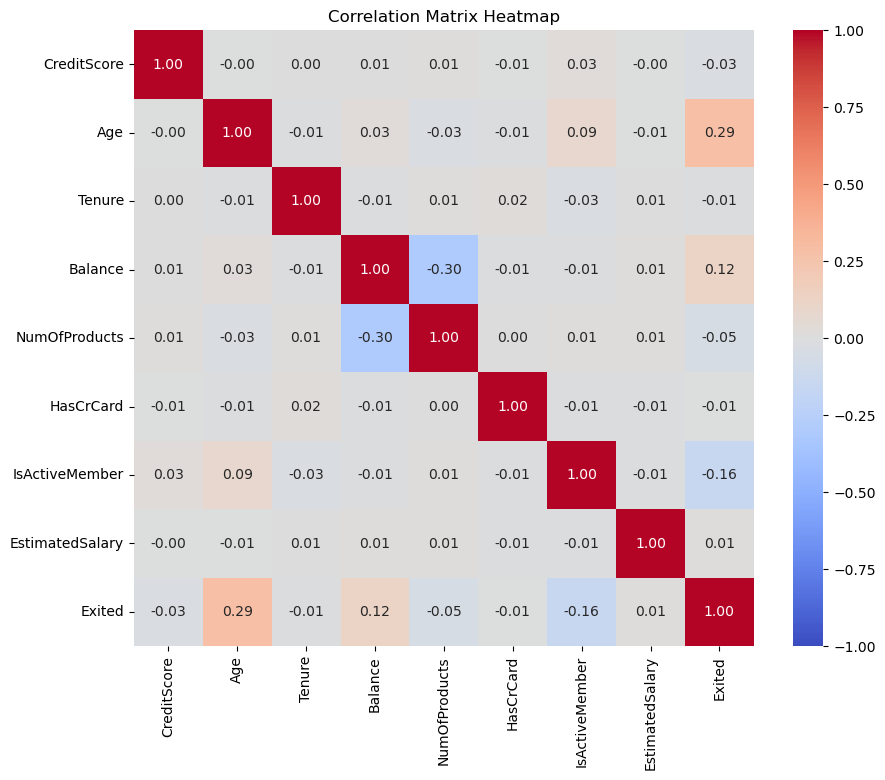

In [83]:
# Computing the correlation matrix
correlation_matrix = df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [84]:
# Converting the categorical values into numerical values
numerical=df.select_dtypes(exclude=['object'])
categorical=df.select_dtypes(include=['object'])
le=LabelEncoder()
encoded=categorical.astype(str).apply(le.fit_transform)
df=pd.concat([numerical,encoded],axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [85]:
X= df.drop('Exited',axis=1)
y=df['Exited']

In [86]:
# Now dealing with imbalanced data using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

The output from oversampling using SMOTE shows that the target variable "Exited" now has an equal number of instances for both classes: 7963 for both the "Exited" (1) and "Not Exited" (0) categories. This balanced dataset will help ensure that the predictive model is not biased towards the majority class and can better learn patterns related to both exiting and non-exiting customers. This approach addresses the class imbalance issue, potentially improving the model’s performance in predicting churn

Standardizing your features prepares them for more effective model training and evaluation, leading to potentially better model performance and more reliable results.

### Splitting the data into train test splits

In [87]:
# Splitting our data into train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (10670, 10)
X_test shape: (5256, 10)
y_train shape: (10670,)
y_test shape: (5256,)


In [88]:
# Initialize the scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [89]:
#Training our Artificial Nueral Network(ANN) using tensorflow and keras
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (10,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'Adam', # forward and backward testing
             loss = 'binary_crossentropy', # This is a loss function
             metrics = ['accuracy']
             )
model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.6809 - loss: 0.5860
Epoch 2/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7822 - loss: 0.4655
Epoch 3/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7945 - loss: 0.4533
Epoch 4/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8065 - loss: 0.4232
Epoch 5/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8119 - loss: 0.4155
Epoch 6/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8150 - loss: 0.4051
Epoch 7/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8197 - loss: 0.4015
Epoch 8/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8241 - loss: 0.3955
Epoch 9/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8205 - loss: 0.3998
Epoch 10/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8268 - loss: 0.3863
Epoch 11/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8307 - loss: 0.3826
Epoch 12/100
334/334 ━━━━━━━━━━━━━━━━━━━

334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8388 - loss: 0.3650
Epoch 69/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8398 - loss: 0.3645
Epoch 70/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8300 - loss: 0.3749
Epoch 71/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8411 - loss: 0.3578
Epoch 72/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8420 - loss: 0.3534
Epoch 73/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8344 - loss: 0.3632
Epoch 74/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8347 - loss: 0.3616
Epoch 75/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8399 - loss: 0.3660
Epoch 76/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8385 - loss: 0.3566
Epoch 77/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8391 - loss: 0.3621
Epoch 78/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8369 - loss: 0.3661
Epoch 79/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 

### Hyperparameter tuning using RandomSearch

In [90]:
import keras_tuner as kt

# Defining the model-building function with hyperparameters
def build_model(hp):
    model = keras.Sequential()
    units = hp.Int('units', min_value=10, max_value=50, step=10)
    model.add(keras.layers.Dense(units=units, activation='relu', input_shape=(10,)))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Instantiating the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='intro_to_kt'
)

# Performing the hyperparameter search with a validation split
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

# Getting the best hyperparameters and best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# Evaluating the best model on the test data
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")



Reloading Tuner from my_dir\intro_to_kt\tuner0.json
Best hyperparameters: {'units': 10, 'learning_rate': 0.01}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8250 - loss: 0.3877
Test accuracy: 0.8262937664985657


### Model training with the best parameters found

In [91]:
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model with the best learning rate
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Fitting the model to the training data
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7532 - loss: 0.5122
Epoch 2/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8015 - loss: 0.4294
Epoch 3/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8135 - loss: 0.4052
Epoch 4/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8261 - loss: 0.3918
Epoch 5/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8302 - loss: 0.3825
Epoch 6/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8269 - loss: 0.3841
Epoch 7/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8233 - loss: 0.3858
Epoch 8/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8212 - loss: 0.3882
Epoch 9/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8268 - loss: 0.3855
Epoch 10/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8329 - loss: 0.3763
Epoch 11/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8315 - loss: 0.3839
Epoch 12/100
334/334 ━━━━━━━━━━━━━━━━━━━━

334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8339 - loss: 0.3729
Epoch 69/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8380 - loss: 0.3649
Epoch 70/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8296 - loss: 0.3772
Epoch 71/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8320 - loss: 0.3718
Epoch 72/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8312 - loss: 0.3705
Epoch 73/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8327 - loss: 0.3721
Epoch 74/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8336 - loss: 0.3684
Epoch 75/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8288 - loss: 0.3822
Epoch 76/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8252 - loss: 0.3770
Epoch 77/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8298 - loss: 0.3719
Epoch 78/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8329 - loss: 0.3807
Epoch 79/100
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 

### Model Testing and Evaluation

In [92]:
test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f"Test Accuracy: {test_accuracy}")

334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8289 - loss: 0.3729
Test Accuracy: 0.8329896926879883


165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2588
           1       0.82      0.83      0.83      2668

    accuracy                           0.82      5256
   macro avg       0.82      0.82      0.82      5256
weighted avg       0.82      0.82      0.82      5256



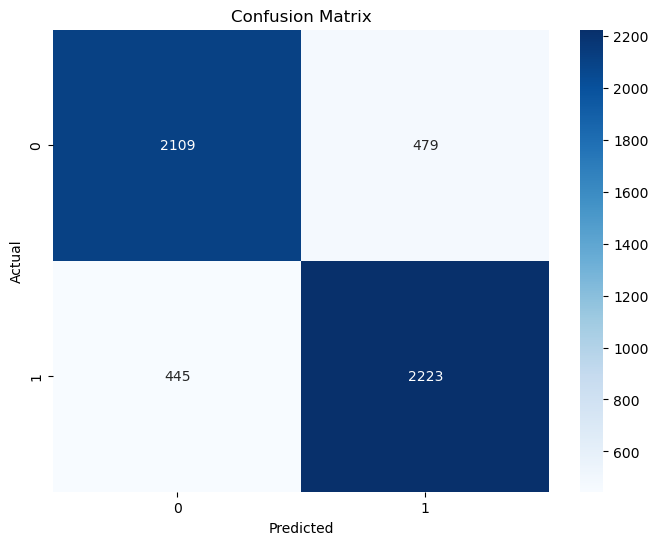

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [96]:
# Creating a DataFrame with true labels, predicted probabilities, and predictions
results_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Probability': y_pred_prob.flatten(),
    'Prediction': y_pred.flatten()
})

print(results_df.head(20))

       True Label  Predicted Probability  Prediction
4822            1               0.980933           1
12857           1               0.829168           1
206             1               0.868897           1
11456           1               0.928265           1
1741            0               0.032212           0
6030            0               0.116562           0
15397           1               0.937705           1
14252           1               0.892252           1
1798            1               0.999010           1
10304           1               0.891930           1
11567           1               0.873423           1
504             0               0.924103           1
3842            0               0.001547           0
4245            0               0.405418           0
14137           1               0.535231           1
15490           1               0.808498           1
10408           1               0.757390           1
7208            0               0.015564      

### Interpreting the Model Results

The model exhibits solid performance with a precision of 0.81 for non-exited customers and 0.84 for exited customers, indicating it accurately predicts customer churn. The recall scores are 0.84 for non-exited and 0.81 for exited, demonstrating that the model effectively identifies both classes with a slight edge in detecting non-exited customers. With an overall accuracy of 82%, the model correctly classifies a substantial majority of instances, reflecting its strong ability to predict customer behavior and manage churn.

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
ANN - AUC: 90.49830 %


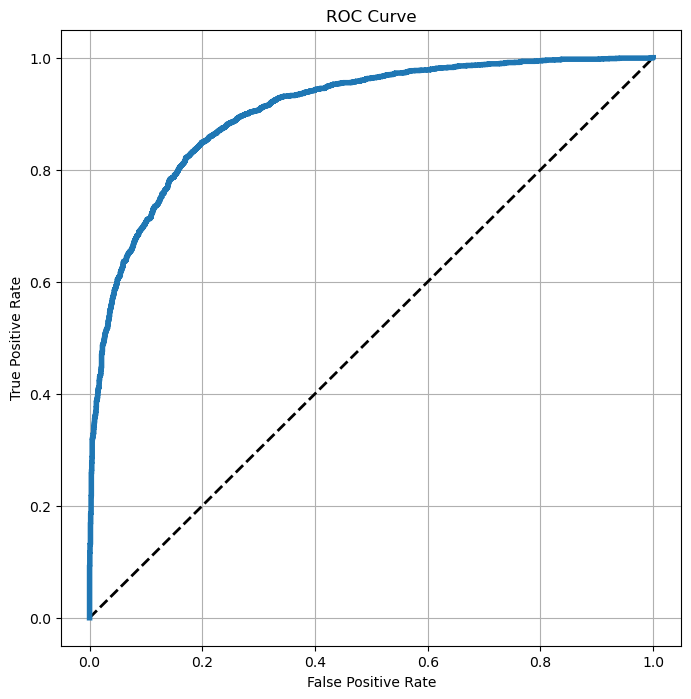

In [97]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred = model.predict(X_test)

print("ANN - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred) * 100), "%")

# Generating ROC curve values:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plotting ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='ANN', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show();

The AUC value of 90% indicates excellent performance. An AUC score close to 100% suggests the model has a high capability to distinguish between the two classes (exited vs. not exited) and is effective at ranking predictions

### Saving the Model

In [98]:
model.save('Ann.keras')